In [25]:
import numpy as np
import matplotlib.pyplot as plt
import mahotas as mh
import SimpleITK as sitk
import pandas as pd
from scipy.ndimage import label

In [3]:
# Import output image
# output = np.load("C:\\Users\\sindhura\\OneDrive - University of Waterloo\\Queens\\CISC 881\\Challenge Data\\validationOutput\\fold0\\LNDb0001-R1-F1.npy")
output = np.load("C:\\Users\\sindh\\OneDrive - University of Waterloo\\Queens\\CISC 881\\Challenge Data\\validationOutput\\fold0\\LNDb0001-R1-F1.npy")


In [4]:
output.max()

0.45339358

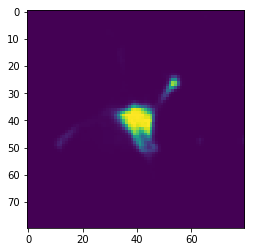

In [5]:
plt.imshow(output[40])

In [6]:
binImg = np.copy(output)


In [7]:
binImg *= 255.0/binImg.max() 

In [8]:
intBinImg = binImg.astype(np.uint8)

In [9]:
otsuThresh = mh.otsu(intBinImg[20])

In [10]:
otsuThresh

64

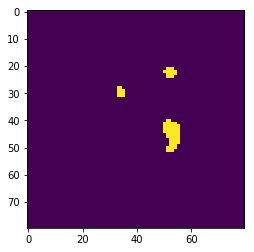

In [11]:
plt.imshow(intBinImg[20] > otsuThresh)

In [12]:
intBinImg[20].max()

217

In [18]:
# intBinImg[20] = intBinImg[20] > otsuThresh

In [19]:
intBinImg[20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
for i in range(intBinImg.shape[2]):
    otsuThreshVal = mh.otsu(intBinImg[i])
    intBinImg[i] = intBinImg[i] > otsuThreshVal

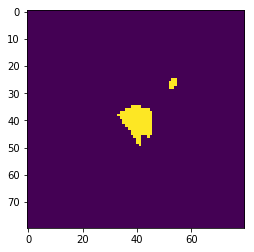

In [14]:
plt.imshow(intBinImg[40])

In [16]:
np.unique(intBinImg)

array([0, 1], dtype=uint8)

3


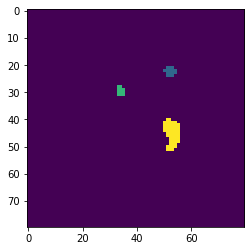

In [25]:
labeled, nNodules = mh.label(intBinImg[20])
print(nNodules)
plt.imshow(labeled)

3


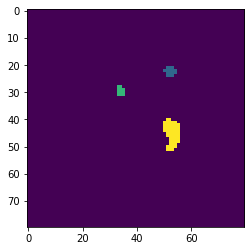

In [30]:
intBinImg[20], nNodules = mh.label(intBinImg[20])
print(nNodules)
plt.imshow(intBinImg[20])

In [53]:
centroid = intBinImg[40,40,40]
centroid

1

In [54]:
segs = np.unique(intBinImg[20])
segs

array([0, 1, 2, 3], dtype=uint8)

In [55]:
intBinImg[20][intBinImg[20] == 2] = 0

In [56]:
np.unique(intBinImg[20])

array([0, 1, 3], dtype=uint8)

In [59]:
range(len(segs))

range(0, 4)

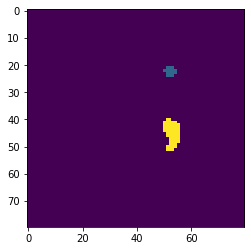

In [60]:
plt.imshow(intBinImg[20])

In [17]:
def thresholdCube(outputArray):
    """
    Author: Sindhura Thirumal
    Takes in array outputted by trainModel and thresholds to create a binary image.
    Output is a label array of each of the nodules in the cube
    """
    outputArray *= 255.0/outputArray.max()  # Scale image to be in range 0-255
    intImg = outputArray.astype(np.uint8)   # Convert data type of array to uint8
    for i in range(intImg.shape[2]):
        otsuThreshVal = mh.otsu(intImg[i])  # Otsu thresholding
        intImg[i] = intImg[i] > otsuThreshVal
        intImg[i], nNodules = mh.label(intImg[i])   # Label the segmentation based on nodule
    return intImg

In [23]:
# Define a 3D structure for the labeling tool
str_3D=np.array([[[0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]],

   [[0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]],

   [[0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]]], dtype='uint8')

In [51]:
newLabel, nSegs = label(intBinImg,structure=str_3D)

In [52]:
newLabel

array([[[  1,   0,   0, ...,   0,   0,   3],
        [  0,   0,   0, ...,   0,   0,   0],
        [  4,   0,   0, ...,   0,   0,   0],
        ...,
        [ 15,   0,   0, ...,   0,   0,   0],
        [ 15,   0,   0, ...,   0,   0,  16],
        [ 15,   0,  17, ...,   0,  16,  16]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 19,   0,   0, ...,   0,   0,  20]],

       [[ 21,   0,   0, ...,   0,   0,  22],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 24,   0,   0, ...,   0,   0,  25]],

       ...,

       [[228,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [18]:
def findCentroidNodule(labeledSeg):
    """
    Author: Sindhura Thirumal
    Given the labeled array of the segmentation (outputted from thresholdCube()), finds the nodule segmentation that
    overlaps with the centroid. Deletes all other nodules within cube. Output is the resulting binary image, only containing
    the centroid nodule.
    """
    centroid = [40, 40, 40]
    centroidSeg = labeledSeg[centroid]  # Get label of the nodule overlapping the centroid
    for i in range(labeledSeg.shape[2]):
        nNods = np.unique(labeledSeg[i])    # Get number of total nodules in segmentation
        for j in range(len(nNods)):
            if j != centroidSeg:
                labeledSeg[i][labeledSeg[i] == j] = 0   # If nodule does not belong to centroid nodule, delete it
    return labeledSeg

In [19]:
labeledSeg = thresholdCube(output)

In [20]:
labeledSeg

array([[[ 1,  0,  0, ...,  0,  0,  3],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 4,  0,  0, ...,  0,  0,  0],
        ...,
        [15,  0,  0, ...,  0,  0,  0],
        [15,  0,  0, ...,  0,  0, 16],
        [15,  0, 17, ...,  0, 16, 16]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  0,  0, ...,  0,  0,  2]],

       [[ 1,  0,  0, ...,  0,  0,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 4,  0,  0, ...,  0,  0,  5]],

       ...,

       [[ 1,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 2,  0,  0, ...,  0,  0

[0 1 2 3 4 5]


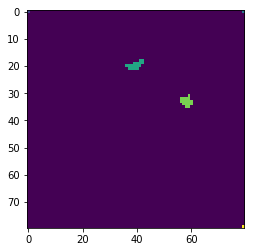

In [60]:
plotting = labeledSeg[5]
print(np.unique(plotting))
plt.imshow(plotting)